In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import timedelta as td
import datetime as dt
import os

In [24]:
irradiance = pd.read_excel('required irradiance-M15.xlsx')
irradiance

,Time,Irradiance (W/m2)
0,2022-09-01 00:00:00,18.619133
1,2022-09-01 00:15:00,19.185267
2,2022-09-01 00:30:00,19.824400
3,2022-09-01 00:45:00,20.102933
4,2022-09-01 01:00:00,20.197867
...,...,...
35035,2023-08-31 22:45:00,35.965400
35036,2023-08-31 23:00:00,36.038467
35037,2023-08-31 23:15:00,36.275000
35038,2023-08-31 23:30:00,36.937067


In [25]:
start_date = '2022-09-01 00:00:00'
end_date = '2023-08-31 23:45:00'
filtered_df = irradiance.loc[irradiance['Time'].between(start_date, end_date)]
filtered_df

#Only include data from 7am to 7pm of each day
filtered_df['Time'] = pd.to_datetime(filtered_df['Time'])
filtered_df = filtered_df.set_index('Time')
filtered_df = filtered_df.between_time('07:00:00', '19:00:00')
filtered_df = filtered_df.reset_index()
filtered_df
filtered_df = filtered_df.resample('D', on='Time').sum()
filtered_df = filtered_df.reset_index()
filtered_df
filtered_df.to_excel('irradiance 7.xlsx', index=False)

In [22]:
visibility = pd.read_excel('required visibility M15.xlsx')
visibility

,Time,Vis (km)
0,2022-09-01 00:00:00,14.933733
1,2022-09-01 00:15:00,15.495267
2,2022-09-01 00:30:00,14.949733
3,2022-09-01 00:45:00,13.731000
4,2022-09-01 01:00:00,14.222000
...,...,...
35035,2023-08-31 22:45:00,12.122933
35036,2023-08-31 23:00:00,12.257267
35037,2023-08-31 23:15:00,12.179800
35038,2023-08-31 23:30:00,12.433467


In [23]:
start_date = '2022-09-01 00:00:00'
end_date = '2023-08-31 23:45:00'
filtered_df = visibility.loc[visibility['Time'].between(start_date, end_date)]
filtered_df

#Only include data from 7am to 7pm of each day
filtered_df['Time'] = pd.to_datetime(filtered_df['Time'])
filtered_df = filtered_df.set_index('Time')
filtered_df = filtered_df.between_time('07:00:00', '19:00:00')
filtered_df = filtered_df.reset_index()
filtered_df
#take the avergae of the visibility of each day
filtered_df = filtered_df.resample('D', on='Time').mean()
filtered_df = filtered_df.reset_index()
filtered_df

filtered_df.to_excel('visibility 7.xlsx', index=False)

In [26]:
irradiance = pd.read_excel('irradiance 7.xlsx')
irradiance
visibility = pd.read_excel('visibility 7.xlsx')
visibility

,Time,Vis (km)
0,2022-09-01,15.416242
1,2022-09-02,15.997045
2,2022-09-03,15.999608
3,2022-09-04,16.000050
4,2022-09-05,15.999124
...,...,...
360,2023-08-27,15.853058
361,2023-08-28,15.516642
362,2023-08-29,13.230330
363,2023-08-30,11.230764


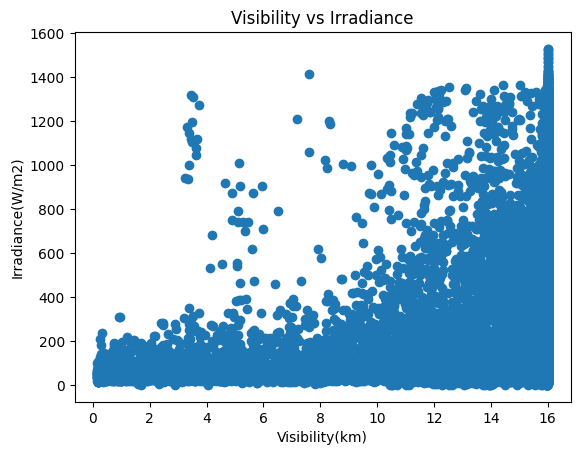

In [12]:
# Plot a scatter plot graph with temperature as x-axis and energy generation as y-axis
plt.scatter(visibility['Vis (km)'], irradiance['Irradiance (W/m2)'])
plt.xlabel('Visibility(km)')
plt.ylabel('Irradiance(W/m2)')
plt.title('Visibility vs Irradiance')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


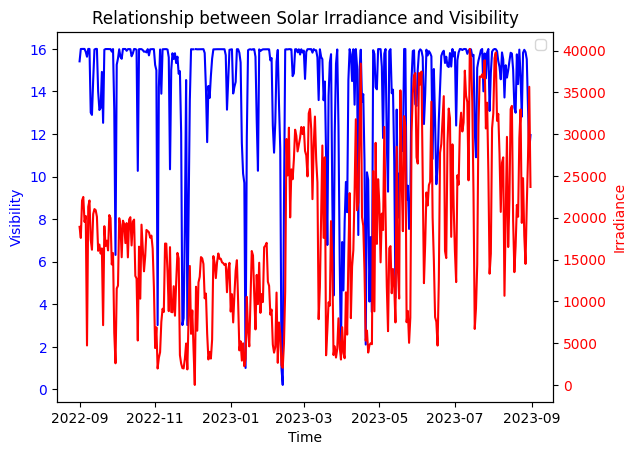

In [27]:
# Create the figure and the first y-axis
fig, ax1 = plt.subplots()

# Plot the first dataset on the first y-axis
ax1.plot(visibility['Time'], visibility['Vis (km)'], color='blue')
ax1.set_xlabel('Time')
ax1.set_ylabel('Visibility', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create the second y-axis
ax2 = ax1.twinx()

# Plot the second dataset on the second y-axis
ax2.plot(irradiance['Time'], irradiance['Irradiance (W/m2)'], color='red')
ax2.set_ylabel('Irradiance', color='red')
ax2.tick_params(axis='y', labelcolor='red')

#add the points on the data
#ax1.scatter(data4['Time'], data4['W/m2'], color='blue')
#plt.scatter(data2['Month'], data2['Mean'], color='red')

# Customize the graph
plt.title('Relationship between Solar Irradiance and Visibility')
plt.legend()
plt.show()


In [8]:
#find the correlation factor
correlation = visibility['Vis (km)'].corr(irradiance['Irradiance (W/m2)'])
correlation

0.22691962084980435